In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

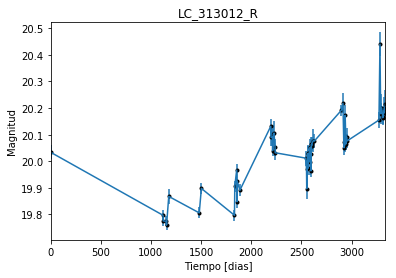

In [2]:
data = np.genfromtxt('LC_313012_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_313012_R')
plt.savefig("LC_313012_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

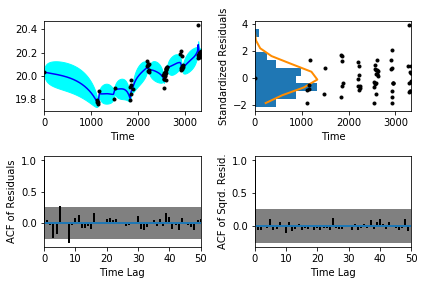

In [5]:
sample.assess_fit()

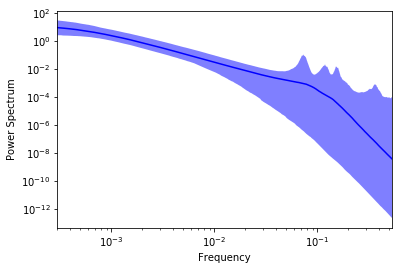

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

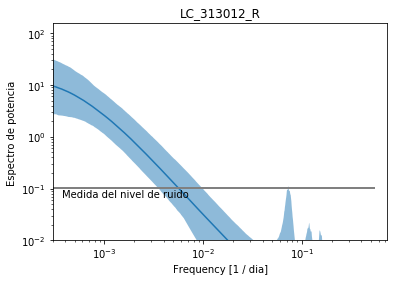

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_313012_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_313012_R')

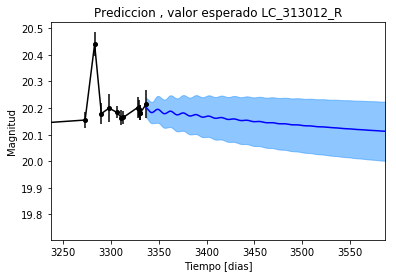

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_313012_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_313012_R')

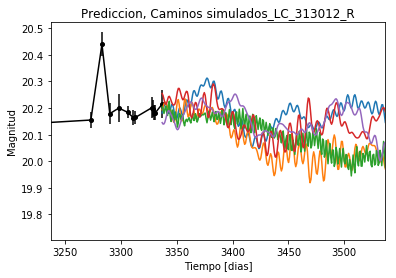

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_313012_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


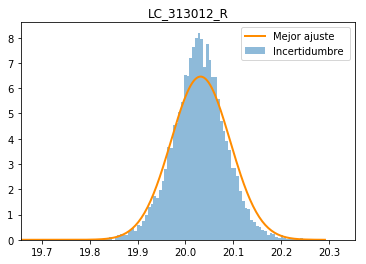

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_313012_R')
plt.savefig("Mejor_ajuste_LC_313012_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_313012_R')

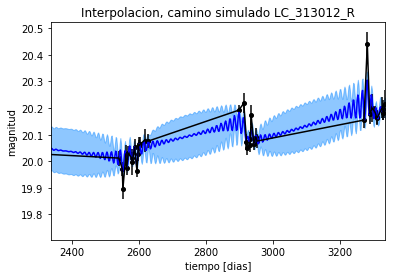

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_R')

Text(0.5,1,'Interpolacion, camino simulado LC_313012_R')

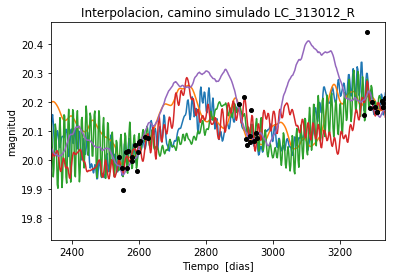

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 805.335525839
Median: 0.00531416622526
Standard deviation: 0.129279158726
68% credibility interval: [ 0.00155323  0.03860031]
95% credibility interval: [  4.67016871e-04   4.70961585e-01]
99% credibility interval: [  3.37023648e-04   9.00779269e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 633.133405124
Median: 0.00429648475228
Standard deviation: 0.0654153067147
68% credibility interval: [ 0.00111392  0.02243577]
95% credibility interval: [ 0.0003768   0.17167694]
99% credibility interval: [  3.12701446e-04   5.00331244e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 491.802062303
Median: 0.212344908684
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 192.345066434
Median: 105.04606048
Standard deviation: 2.54992277984
68% credibility interval: [ 102.33934432  107.49983645]
95% credibility interval: [  99.29427251  109.01118839]
99% credibility interval: [  97.41628439  109.6080941 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 328.262752631
Median: 1.65744157121
Standard deviation: 2.21488466162
68% credibility interval: [ 0.38732996  4.6524186 ]
95% credibility interval: [ 0.05504241  7.44084162]
99% credibility interval: [  0.02121265  11.13520536]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 588.395246494
Median: 0.918929393545
Standard deviation: 10.5220655347
68% credibility interval: [  0.24317838  10.64864331]
95% credibility interval: [  0.0971208 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18622.4457247
Median: 1.07840486735e-64
Standard deviation: 2194.8916407
68% credibility interval: [  1.34966398e-85   4.29485532e-18]
95% credibility interval: [  1.66527730e-125   3.43684925e+000]
99% credibility interval: [  1.97901337e-168   1.48534656e+002]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1501.82483661
Median: 20.003889011
Standard deviation: 0.0726296452818
68% credibility interval: [ 19.93978759  20.06859986]
95% credibility interval: [ 19.86066919  20.16120465]
99% credibility interval: [ 19.79675022  20.23911088]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 283.82923463
Median: 0.115056472002
Standard deviation: 0.243753457229
68% credibility interval: [ 0.06662196  0.41514041]
95% credibility interval: [ 0.          0.92174832]
99% credibility interval: [ 0.          1.04125227]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 283.82923463
Median: 0.115056472002
Standard deviation: 0.243753457229
68% credibility interval: [ 0.06662196  0.41514041]
95% credibility interval: [ 0.          0.92174832]
99% credibility interval: [ 0.          1.04125227]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1862.99274724
Median: 0.0
Standard deviation: 0.00017402817903
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 192.345066434
Median: 105.04606048
Standard deviation: 2.54992277984
68% credibility interval: [ 102.33934432  107.49983645]
95% credibility interval: [  99.29427251  109.01118839]
99% credibility interval: [  97.41628439  109.6080941 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2695.68455579
Median: 0.0216001536214
Standard deviation: 0.0141755818934
68% credibility interval: [ 0.01394327  0.03530964]
95% credibility interval: [ 0.0097147   0.06080663]
99% credibility interval: [ 0.00789412  0.07949248]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 818.256027755
Median: 1.283346731
Standard deviation: 0.295781219646
68% credibility interval: [ 1.00568679  1.64010877]
95% credibility interval: [ 0.80772501  1.90656225]
99% credibility interval: [ 0.7032056   1.97939455]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 482.926317923
Median: 0.00859864802431
Standard deviation: 0.408295675421
68% credibility interval: [ 0.00087293  0.16510735]
95% credibility interval: [  3.14272974e-05   1.39664040e+00]
99% credibility interval: [  1.58423394e-06   2.70426868e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 805.335525839
Median: (-0.0333898911465-0.951402849756j)
Standard deviation: 1.73362235921
68% credibility interval: [-0.24253290-0.44044526j -0.00975921-0.46498346j]
95% credibility interval: [ -2.95913891e+00+0.j          -2.93435354e-03-0.73676563j]
99% credibility interval: [ -5.65976307e+00+0.j          -2.11758203e-03-2.32112404j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 633.133405124
Median: (-0.026995609868+0.930506709501j)
Standard deviation: 1.58574092041
68% credibility interval: [-0.14096807+3.34785347j -0.00699900+0.48068054j]
95% credibility interval: [-1.07867801+5.44076792j -0.00236751+0.60936062j]
99% credibility interval: [ -3.14367392e+00+1.0904144j   -1.96476113e-03+0.45803968j]
Posterior sum